In [57]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 10000)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [58]:
# Load the data file into a dataframe
telecom = pd.read_csv('telecom_churn_data.csv')

In [59]:
# Copy the data into another dataframe
tdf = telecom.copy()

In [60]:
tdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [61]:
# View the details of all columns in dataframe
tdf.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [62]:
# Shape of dataframe
tdf.shape

(99999, 226)

In [63]:
# View the count of unique records in circle id
tdf['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

In [64]:
# Drop circle_id as all records have only one value 109
tdf.drop(['circle_id'],axis=1,inplace=True)

In [65]:
# Columns with only on uniqe value
for c in tdf.columns:
    if len(tdf[c].value_counts()) == 1:
        print(tdf[c].value_counts())
        
# loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8
# std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8 & std_ic_t2o_mou_9
# have only one value in all records i.e 0. Hence drop these columns

# last_date_of_month_6 tells the last day for the month of July
# last_date_of_month_7 tells the last day for the month of August
# last_date_of_month_8 tells the last day for the month of September
# last_date_of_month_9 tells the last day for the month of October
# Deleting the above columns as well

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64
0.0    92254
Name: std_og_t2c_mou_9, dtype: int64
0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64
0.0    92254
Name: std_ic_t2o_mou_9, dtype: int64


In [66]:
# loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8
# std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8 & std_ic_t2o_mou_9
# have only one value in all records i.e 0. Hence drop these columns
tdf.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
         'std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
         'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1,inplace=True)

In [67]:
#List all columns with word date in it
dt = tdf.columns[tdf.columns.str.contains('date')]
dt

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [68]:
# Drop these date columns as we have AON column (Age on network - number of days the customer is using the operator T network)
tdf.drop(dt,axis=1,inplace=True)

In [69]:
# Check the data types of all columns
tdf.dtypes

# Confirmed all the columns are of numeric data type

mobile_number           int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2f_mou_9      float64
loc_og_t2c

In [70]:
tdf.shape

(99999, 202)

In [71]:
# Assuming the 6th and 7th month are part of good phase. 8th month is Action Phase & 9th month is Churn Phase

# As the requirement of the case study, limit the data sample to customers who contribute more towards
# company's revenue by doing higher recharge. 
# Hence compute the average of 6th and 7th month(good phase) of total recharge for each user. 
# Then consider only the customers with recharge amt > 70th percentile of this average value

# As 6th and 7th months are part of good phase, combining the data for these two months in one variable called average.
# Thus reducing the number of variables. And then later drop all the original variables for 6th and 7th month.

col_6 = list(tdf.columns[tdf.columns.str.contains("_6")])
print(col_6)
col_7 = list(tdf.columns[tdf.columns.str.contains("_7")])
print(col_7)

print(len(col_7))

i=0
new_df_6 = tdf[col_6]
new_df_7 = tdf[col_7]
new_df_n=pd.DataFrame
while i < len(col_6):
    new_col='avg_'+col_6[i]+"_7"
    tdf[new_col]=(new_df_6.iloc[:,i]+new_df_7.iloc[:,i])/2
    i=i+1
    

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6']
['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'lo

In [72]:
tdf.shape

(99999, 251)

In [73]:
# View the new columns
tdf.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'avg_vol_2g_mb_6_7', 'avg_vol_3g_mb_6_7', 'avg_arpu_3g_6_7',
       'avg_arpu_2g_6_7', 'avg_night_pck_user_6_7', 'avg_monthly_2g_6_7',
       'avg_sachet_2g_6_7', 'avg_monthly_3g_6_7', 'avg_sachet_3g_6_7',
       'avg_fb_user_6_7'],
      dtype='object', length=251)

In [74]:
# Drop the original 49*2 columns.
tdf.drop(col_6,axis=1,inplace=True)
tdf.drop(col_7,axis=1,inplace=True)
tdf.shape

(99999, 153)

In [75]:
# Compute Percentile on average recharge amount
tdf['avg_total_rech_amt_6_7'].describe(percentiles=[0.2,0.5,0.7,0.9])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
20%         99.500000
50%        229.000000
70%        368.500000
90%        698.000000
max      37762.500000
Name: avg_total_rech_amt_6_7, dtype: float64

In [76]:
# The 70th percentile value is 368
# Make a new dataframe with customer having total recharge amt > 368
tdf_cust = tdf[tdf['avg_total_rech_amt_6_7']>368].copy()

In [77]:
tdf_cust.shape

(30011, 153)

In [78]:
# columns with name total
tdf_cust.columns[tdf_cust.columns.str.contains('total')]

# We have columns with Total Outgoing MOU, Total Incoming MOU, Total Recharge Num(times)
# and Total Recharge Amount for all months
# There is no column called Total Recharge amount only for data

Index(['total_og_mou_8', 'total_og_mou_9', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_8',
       'total_rech_amt_9', 'total_rech_data_8', 'total_rech_data_9',
       'avg_total_og_mou_6_7', 'avg_total_ic_mou_6_7',
       'avg_total_rech_num_6_7', 'avg_total_rech_amt_6_7',
       'avg_total_rech_data_6_7'],
      dtype='object')

In [79]:
# columns with name av (average)
tdf_cust.columns[tdf_cust.columns.str.contains('av_')]

# We can see we have columns called average recharge amount for data by all months.
# We dont have a average recharge amount for call (non data)

Index(['av_rech_amt_data_8', 'av_rech_amt_data_9', 'avg_av_rech_amt_data_6_7'], dtype='object')

In [80]:
# columns with name max 
tdf_cust.columns[tdf_cust.columns.str.contains('max')]

# Not sure if we will use these max columns. Will see the siginificance of these columns later in the process

Index(['max_rech_amt_8', 'max_rech_amt_9', 'max_rech_data_8',
       'max_rech_data_9', 'avg_max_rech_amt_6_7', 'avg_max_rech_data_6_7'],
      dtype='object')

In [81]:
# Checking percentage of missing values with columns more than 60% null values
cols=round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2)[round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2) > 60]
cols
# More than 60% of the customers dont recharge for mobile internet 
# or use any mobile internet / data.

# Since all these columns are related to mobile internet, hence NA value is equivalent to 0 [customer is not using internet services].# 
# Therefore imputing the below columns with value 0.

total_rech_data_8           60.83
total_rech_data_9           61.81
max_rech_data_8             60.83
max_rech_data_9             61.81
count_rech_2g_8             60.83
count_rech_2g_9             61.81
count_rech_3g_8             60.83
count_rech_3g_9             61.81
av_rech_amt_data_8          60.83
av_rech_amt_data_9          61.81
arpu_3g_8                   60.83
arpu_3g_9                   61.81
arpu_2g_8                   60.83
arpu_2g_9                   61.81
night_pck_user_8            60.83
night_pck_user_9            61.81
fb_user_8                   60.83
fb_user_9                   61.81
avg_total_rech_data_6_7     69.27
avg_max_rech_data_6_7       69.27
avg_count_rech_2g_6_7       69.27
avg_count_rech_3g_6_7       69.27
avg_av_rech_amt_data_6_7    69.27
avg_arpu_3g_6_7             69.27
avg_arpu_2g_6_7             69.27
avg_night_pck_user_6_7      69.27
avg_fb_user_6_7             69.27
dtype: float64

In [82]:
# Fill the NA values with zero as Null values for these columns
# means the user is not using any mobile internet.
tdf_cust[cols.index]=tdf_cust[cols.index].fillna(0)

In [83]:
# Columns with NA values
round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2)[round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2) != 0]

onnet_mou_8               3.13
onnet_mou_9               5.68
offnet_mou_8              3.13
offnet_mou_9              5.68
roam_ic_mou_8             3.13
roam_ic_mou_9             5.68
roam_og_mou_8             3.13
roam_og_mou_9             5.68
loc_og_t2t_mou_8          3.13
loc_og_t2t_mou_9          5.68
loc_og_t2m_mou_8          3.13
loc_og_t2m_mou_9          5.68
loc_og_t2f_mou_8          3.13
loc_og_t2f_mou_9          5.68
loc_og_t2c_mou_8          3.13
loc_og_t2c_mou_9          5.68
loc_og_mou_8              3.13
loc_og_mou_9              5.68
std_og_t2t_mou_8          3.13
std_og_t2t_mou_9          5.68
std_og_t2m_mou_8          3.13
std_og_t2m_mou_9          5.68
std_og_t2f_mou_8          3.13
std_og_t2f_mou_9          5.68
std_og_mou_8              3.13
std_og_mou_9              5.68
isd_og_mou_8              3.13
isd_og_mou_9              5.68
spl_og_mou_8              3.13
spl_og_mou_9              5.68
og_others_8               3.13
og_others_9               5.68
loc_ic_t

In [84]:
# Since all these columns with NA values are numeric columns hence imputing NA values with value 0.
tdf_cust.fillna(0,inplace=True)

In [85]:
# Now create a column called Churn with value 1 if customer did churn and value 0 if customer didnt churn 
# based on 9th month data.
# We can tag a customer as churned if user has not made any outgoing calls or received any incoming calls
# and has not used internet at all during the 9th month even though the customer has been recharging.

# List all the columns with string _9
tdf_cust.columns[tdf_cust.columns.str.contains('_9')]


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],
      dtype='object')

In [86]:
tdf_cust['Churn'] = np.where(((tdf_cust['total_ic_mou_9']==0.0) & (tdf_cust['total_og_mou_9']==0.0) & (tdf_cust['vol_2g_mb_9']==0.0)
                            & (tdf_cust['vol_3g_mb_9']==0.0) & (tdf_cust['fb_user_9']==0.0)),1,0)

In [87]:
tdf_cust.head()

,mobile_number,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,...,avg_vol_3g_mb_6_7,avg_arpu_3g_6_7,avg_arpu_2g_6_7,avg_night_pck_user_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_fb_user_6_7,Churn
7,7000701601,3171.480,500.000,52.29,0.00,325.91,0.00,31.64,0.00,38.06,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,7001524846,137.362,166.787,35.08,33.46,136.48,108.71,0.00,0.00,0.00,...,375.475,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0
13,7002191713,593.260,322.732,534.24,244.81,482.46,214.06,72.11,136.78,1.44,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16,7000875565,187.894,206.490,70.61,31.34,162.76,224.39,0.00,0.00,0.00,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17,7000187447,25.499,257.583,7.79,558.51,5.54,87.89,4.81,0.00,13.34,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


0    27418
1     2593
Name: Churn, dtype: int64

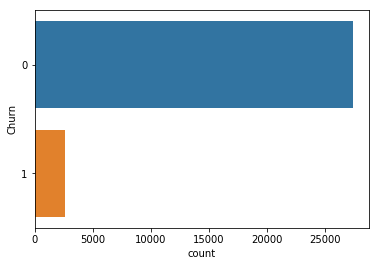

In [88]:
# number of churn and non churn in data
sns.countplot(y = 'Churn', data = tdf_cust)

# Out of the total 30,000 records, 27k customers dint churn and 2593 customers churned. 
# Churn rate is 8.64%. As we can see the data is not balanced and majority of the customers did not churn. 
# This point needs to be kept in consideration while modelling.
tdf_cust['Churn'].value_counts()

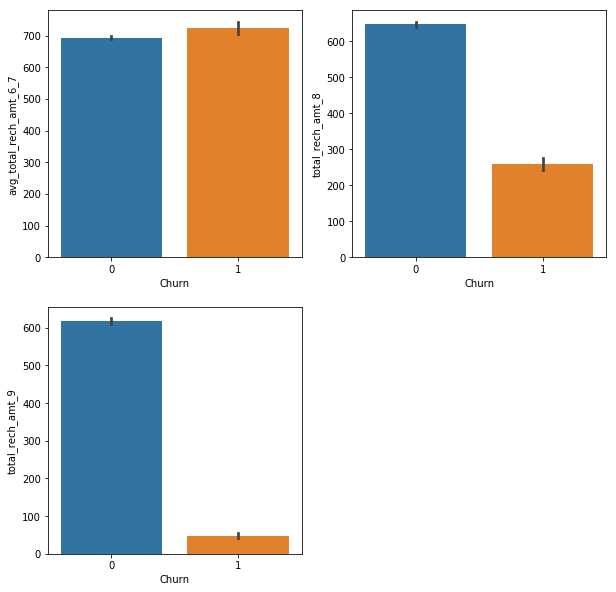

In [89]:
# number of churn and non churn in data by total recharge amount
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_total_rech_amt_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='total_rech_amt_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='total_rech_amt_9', data = tdf_cust)
plt.show()

# We can see that for customers who have churned, their recharge amount keeps decreasing as month goes by.
# For the customers who did not churn by month 9, the recharge amount is constant.

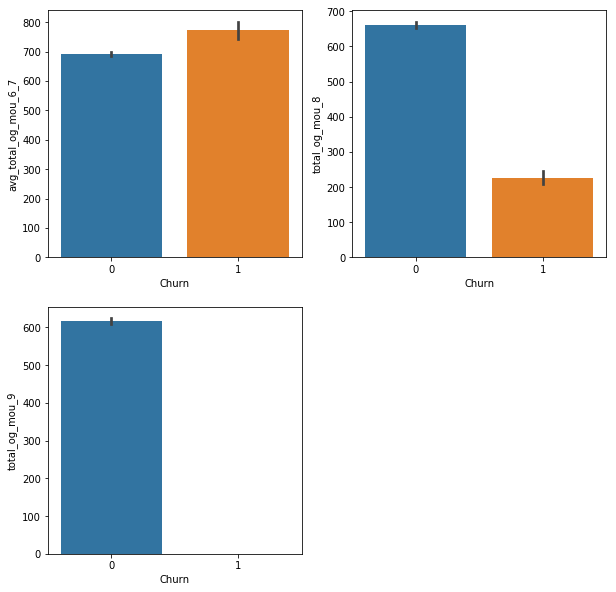

In [90]:
# number of churn and non churn in data by Total Outgoing MOU
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_total_og_mou_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='total_og_mou_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='total_og_mou_9', data = tdf_cust)
plt.show()

# We can see that for customers who have churned, their Total outgoing MOU reduces drastically for 8th month.
# For the customers who did not churn by month 9, the total outgoing MOU is constant.

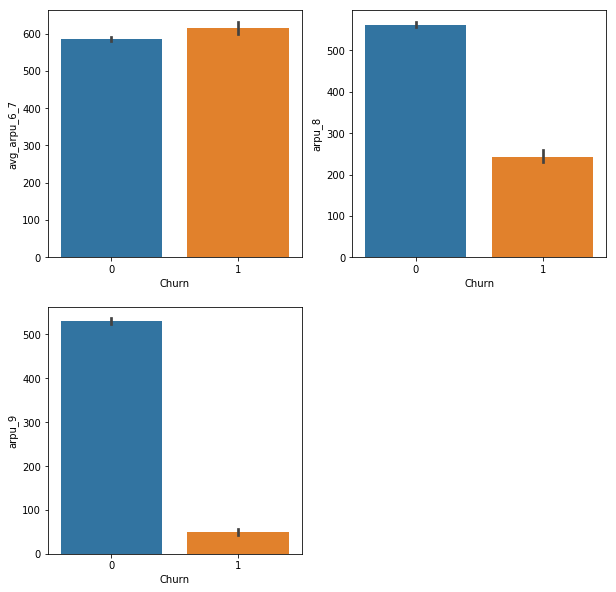

In [91]:
# number of churn and non churn in data by ARPU
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_arpu_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='arpu_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='arpu_9', data = tdf_cust)
plt.show()

# ARPU was high for churn customers than non churn customers for the months 6 and 7. Then it reduced drastically in 
# month 8.

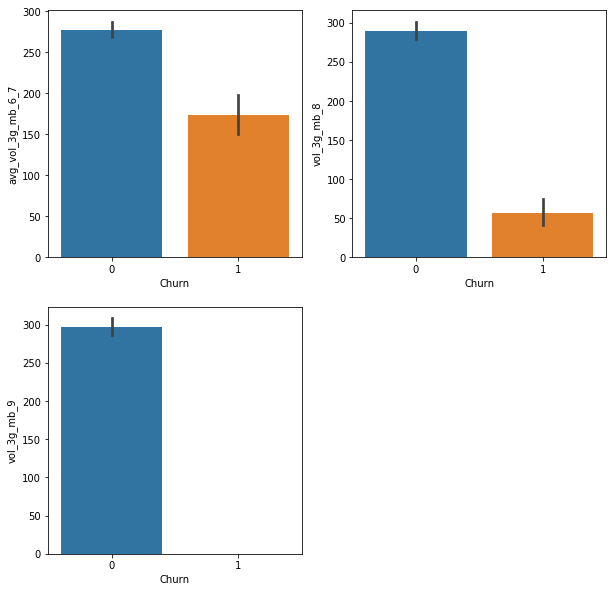

In [92]:
# number of churn and non churn in data by Mobile 3G Data Usage Volume
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_vol_3g_mb_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='vol_3g_mb_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='vol_3g_mb_9', data = tdf_cust)
plt.show()

# Mobile Net Usage was high for the months 6 and 7. Then it reduced drastically in month 8.

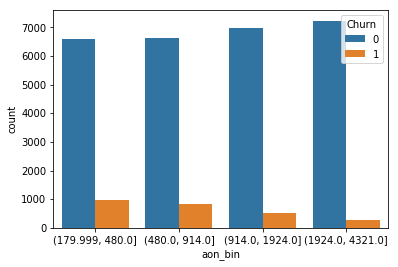

In [93]:
# Plot AON (Age On Network) and Churn to see the age of customers who got churned.

# Looks like the AON is in number of days. 
# Binning the AON data into 4 bins and plotting them against Churn variable
tdf_cust['aon_bin'] = pd.qcut(tdf_cust['aon'], q=4)
sns.countplot(tdf_cust['aon_bin'],hue=tdf_cust['Churn'])

#Drop the variable AON_BIN.
tdf_cust.drop('aon_bin',axis=1,inplace=True)

# We can see from the below graph that the number of churn customers reduces with increase in AON numbers. This means
# customers who have been for longer period with the business have less probability to churn.

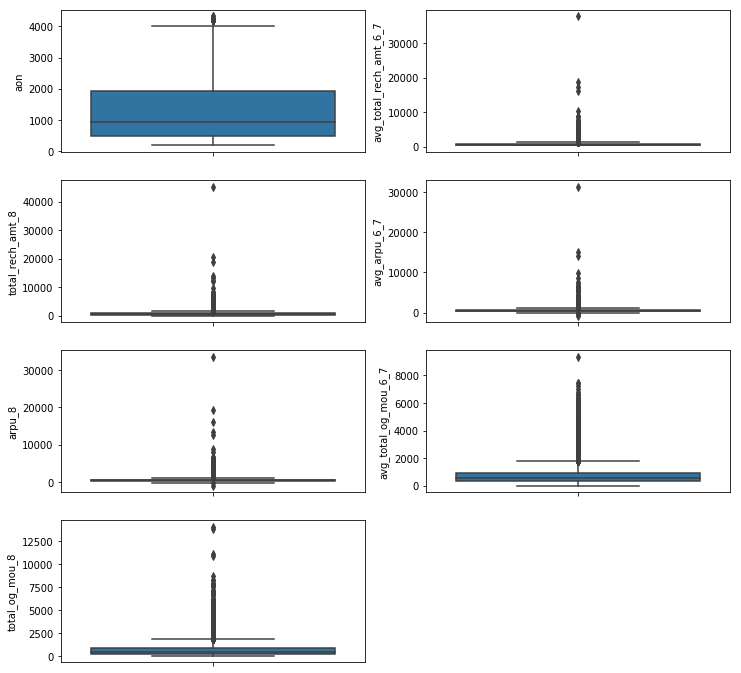

In [94]:
# Boxplot to view the outliers visually
# in variables - Total Recharge Amount, Max Recharge Amount, ARPU, AON, VBC, Total Incoming MOU, Total Outgoing MOU
plt.figure(figsize=(12, 12))
plt.figure(1)
plt.subplot(421)
sns.boxplot(data=tdf_cust,y='aon')
plt.subplot(422)
sns.boxplot(data=tdf_cust,y='avg_total_rech_amt_6_7')
plt.subplot(423)
sns.boxplot(data=tdf_cust,y='total_rech_amt_8')
plt.subplot(424)
sns.boxplot(data=tdf_cust,y='avg_arpu_6_7')
plt.subplot(425)
sns.boxplot(data=tdf_cust,y='arpu_8')
plt.subplot(426)
sns.boxplot(data=tdf_cust,y='avg_total_og_mou_6_7')
plt.subplot(427)
sns.boxplot(data=tdf_cust,y='total_og_mou_8')

plt.show()

In [95]:
# Drop mobile number as it doesnt contribute to our data analysis
# Copy to another final data frame from where we will remove mobile number and all 9th month related data

tdf_final = tdf_cust.copy()
tdf_final.drop('mobile_number',axis=1,inplace=True)
tdf_final.drop(tdf_final.columns[tdf_final.columns.str.contains("_9")],axis=1,inplace=True)

In [96]:
# Shape of final dataframe
tdf_final.shape

(30011, 104)

In [97]:
# Check for highly correlated columns
cor=tdf_final.corr()
cor

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,avg_vol_3g_mb_6_7,avg_arpu_3g_6_7,avg_arpu_2g_6_7,avg_night_pck_user_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_fb_user_6_7,Churn
arpu_8,1.000000,0.315016,0.493213,0.101214,0.186779,0.151861,0.311892,0.135820,0.055861,0.304590,...,0.151509,0.179350,0.166108,0.011718,0.006722,-0.013836,0.157245,0.030521,0.072055,-0.182294
onnet_mou_8,0.315016,1.000000,0.069459,0.009867,0.077407,0.457610,0.000202,-0.039375,0.069517,0.290999,...,-0.073897,-0.073644,-0.075945,0.006380,-0.081613,-0.027725,-0.075384,-0.023416,-0.121513,-0.097004
offnet_mou_8,0.493213,0.069459,1.000000,0.032520,0.110903,0.061973,0.449096,0.087942,0.065244,0.332300,...,-0.070306,-0.057211,-0.062158,-0.019273,-0.052500,-0.038069,-0.056276,-0.037981,-0.099240,-0.145272
roam_ic_mou_8,0.101214,0.009867,0.032520,1.000000,0.560314,-0.011602,-0.053951,-0.016757,0.001422,-0.042924,...,0.016438,0.028479,0.024086,0.005901,-0.002307,-0.011054,0.027440,-0.004022,0.009195,0.061075
roam_og_mou_8,0.186779,0.077407,0.110903,0.560314,1.000000,-0.024303,-0.052886,-0.022853,0.003575,-0.050711,...,-0.001552,0.008250,0.007194,-0.000490,-0.018635,-0.020916,0.009671,-0.010646,-0.023718,0.072375
loc_og_t2t_mou_8,0.151861,0.457610,0.061973,-0.011602,-0.024303,1.000000,0.193140,0.054938,0.016105,0.767162,...,-0.005555,0.001821,-0.000358,-0.008876,0.001380,0.006112,-0.001588,-0.008683,0.022394,-0.092254
loc_og_t2m_mou_8,0.311892,0.000202,0.449096,-0.053951,-0.052886,0.193140,1.000000,0.196892,0.006165,0.775305,...,-0.007195,0.012654,0.004721,-0.021771,0.017873,-0.028160,0.010016,-0.023271,0.018917,-0.174892
loc_og_t2f_mou_8,0.135820,-0.039375,0.087942,-0.016757,-0.022853,0.054938,0.196892,1.000000,-0.007693,0.216510,...,0.010067,0.027605,0.021435,-0.014389,0.029055,-0.046808,0.033263,-0.019952,0.022569,-0.078018
loc_og_t2c_mou_8,0.055861,0.069517,0.065244,0.001422,0.003575,0.016105,0.006165,-0.007693,1.000000,0.013839,...,-0.003408,-0.008420,-0.007741,0.040689,-0.010127,0.024641,-0.014095,0.029957,0.003160,-0.033213
loc_og_mou_8,0.304590,0.290999,0.332300,-0.042924,-0.050711,0.767162,0.775305,0.216510,0.013839,1.000000,...,-0.007612,0.010797,0.003978,-0.020428,0.013940,-0.016713,0.007236,-0.021572,0.027708,-0.175448


In [98]:
# Correlation Matrix
cor['Churn'][:].sort_values(ascending=False)

# As it can be seen that STD and Roaming Outgoing Minutes of Usage for 6th month & 7h month is most correlated variable to churn.
# Also Roaming Outgoing Minutes of Usage for 8th month is highly correlated to churn
# Total and Local Incoming Minutes of Usage, ARPU, Total Recharge amount and Total Outgoing
# Minutes of usage for 8th month are highly  negatively correlated to churn. 
# This shows any usage during 8th month will not result in customer getting churned during 9th month.

Churn                       1.000000
avg_std_og_mou_6_7          0.093635
avg_roam_og_mou_6_7         0.083308
roam_og_mou_8               0.072375
avg_std_og_t2m_mou_6_7      0.072121
avg_std_og_t2t_mou_6_7      0.066095
avg_roam_ic_mou_6_7         0.063653
roam_ic_mou_8               0.061075
avg_total_og_mou_6_7        0.037790
avg_onnet_mou_6_7           0.037363
avg_total_rech_num_6_7      0.034195
avg_og_others_6_7           0.020316
avg_arpu_6_7                0.019854
avg_total_rech_amt_6_7      0.016692
avg_offnet_mou_6_7          0.016670
avg_std_ic_t2t_mou_6_7      0.008606
avg_spl_og_mou_6_7          0.007307
og_others_8                 0.007093
avg_loc_og_t2c_mou_6_7      0.005840
avg_isd_og_mou_6_7          0.005377
avg_sachet_3g_6_7          -0.001887
avg_std_ic_mou_6_7         -0.003725
avg_isd_ic_mou_6_7         -0.004978
isd_og_mou_8               -0.005752
avg_std_ic_t2m_mou_6_7     -0.007890
avg_night_pck_user_6_7     -0.008015
avg_spl_ic_mou_6_7         -0.008573
a

In [99]:
# Now lets view the highly intercorrelated variables 
# Replace the diagonal value of 1 to 0.
np.fill_diagonal(cor.values,0)

# Now find variables which are highly correlated
cor.unstack().sort_values(ascending=False).head(10)

# Not dropping any variables as of now. Just reviewing the highly correlated variables.
# We will be doing PCA (Principal Component analysis) which will handle the correlated variables by converting them
# into a set of uncorrelated components. 

sachet_2g_8             count_rech_2g_8           0.981607
count_rech_2g_8         sachet_2g_8               0.981607
avg_total_rech_amt_6_7  avg_arpu_6_7              0.974452
avg_arpu_6_7            avg_total_rech_amt_6_7    0.974452
avg_arpu_3g_6_7         avg_arpu_2g_6_7           0.962620
avg_arpu_2g_6_7         avg_arpu_3g_6_7           0.962620
avg_count_rech_2g_6_7   avg_sachet_2g_6_7         0.957332
avg_sachet_2g_6_7       avg_count_rech_2g_6_7     0.957332
total_rech_amt_8        arpu_8                    0.953725
arpu_8                  total_rech_amt_8          0.953725
dtype: float64

In [100]:
# Drop the below highly correlated variables with around 90% correlation
#tdf_final.drop(['count_rech_2g_8','avg_count_rech_2g_6_7','avg_arpu_6_7','arpu_8',
#                'avg_arpu_2g_6_7','arpu_2g_8','avg_arpu_3g_6_7','arpu_3g_8',
#                'avg_total_rech_data_6_7','total_rech_data_8',
#                'avg_isd_og_mou_6_7',
#               'avg_count_rech_3g_6_7','count_rech_3g_8','avg_max_rech_data_6_7',
#                'std_og_t2t_mou_8','avg_std_og_t2t_mou_6_7','std_og_mou_8',
#                'std_og_t2m_mou_8','avg_std_og_t2m_mou_6_7',
#               'avg_std_ic_t2m_mou_6_7','std_ic_t2m_mou_8','avg_loc_ic_t2m_mou_6_7','loc_ic_t2m_mou_8',
#                'avg_total_ic_mou_6_7',
#                'avg_loc_ic_t2t_mou_6_7','avg_loc_ic_t2f_mou_6_7']
#               ,axis=1,inplace=True)

In [101]:
tdf_final.shape

(30011, 104)

In [102]:
# Modelling

In [103]:
# Copy the dataframe into a new dataframe for Logistic REgression model
tdf_lr=tdf_final.copy()

In [104]:
# Split the data into X and y
y = tdf_lr['Churn']
X = tdf_lr.drop('Churn',axis=1)

In [105]:
# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=100)

In [106]:
# Scale the Train data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [107]:
X_train_scaled

array([[-0.31896863,  0.32011514, -0.5944058 , ..., -0.33528535,
        -0.16473418, -0.63010906],
       [-0.12015727, -0.28988925, -0.42711756, ..., -0.33528535,
        -0.16473418, -0.63010906],
       [ 0.05430301, -0.38625612,  0.07451954, ..., -0.33528535,
        -0.16473418, -0.63010906],
       ...,
       [-0.02715859, -0.4858491 ,  0.55937609, ..., -0.33528535,
        -0.16473418, -0.63010906],
       [ 0.01156133,  0.72851919, -0.72275322, ..., -0.33528535,
        -0.16473418, -0.63010906],
       [-0.11636673, -0.12117437, -0.08583715, ..., -0.33528535,
        -0.16473418, -0.63010906]])

In [108]:
# PCA - Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
#Performing the PCA
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [109]:
# List PCA components
pca.components_

array([[ 8.44997385e-02, -3.75280397e-02, -1.50751180e-02, ...,
         1.96361028e-01,  9.28769776e-02,  1.87493559e-01],
       [ 2.11835896e-01,  1.46236232e-01,  2.02506305e-01, ...,
        -2.23357294e-02, -3.80747694e-02, -4.70701674e-02],
       [ 1.21616249e-01,  1.62214170e-01,  1.07267984e-01, ...,
         3.35107049e-02,  7.31165028e-02, -2.43060023e-03],
       ...,
       [-0.00000000e+00, -8.03376875e-16, -3.84841244e-16, ...,
         1.51071129e-16,  4.11505965e-16,  2.87879866e-16],
       [-0.00000000e+00, -3.74153034e-15, -3.23222767e-15, ...,
         1.76912877e-16, -3.83209824e-17,  3.05722329e-17],
       [-0.00000000e+00, -2.50919496e-15, -2.39948173e-15, ...,
        -1.64905631e-16, -2.10777276e-16,  9.51646238e-17]])

In [110]:
# Total number of components
pca.n_components_

103

In [111]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([1.30071231e-01, 8.73867030e-02, 7.36817910e-02, 5.67169374e-02,
       4.10431998e-02, 3.48065632e-02, 3.07734819e-02, 2.87022144e-02,
       2.48695439e-02, 2.46225896e-02, 2.22595798e-02, 2.13595448e-02,
       2.04272997e-02, 1.91246351e-02, 1.87804278e-02, 1.80025758e-02,
       1.69273354e-02, 1.65442332e-02, 1.53578068e-02, 1.48811330e-02,
       1.45968207e-02, 1.28713830e-02, 1.24538747e-02, 1.19350104e-02,
       1.14220419e-02, 1.07963864e-02, 1.04735996e-02, 1.00100791e-02,
       9.14738695e-03, 8.86625184e-03, 8.58486131e-03, 8.25889385e-03,
       8.15515831e-03, 7.81219570e-03, 7.60579271e-03, 7.43299025e-03,
       6.75631497e-03, 6.44748584e-03, 6.16084251e-03, 5.89912506e-03,
       5.85240960e-03, 5.26121521e-03, 5.15653865e-03, 4.85009153e-03,
       4.75486439e-03, 4.51891372e-03, 4.37064175e-03, 3.88559135e-03,
       3.83800688e-03, 3.60526525e-03, 3.19795323e-03, 3.11279302e-03,
       2.98738104e-03, 2.82084456e-03, 2.78664288e-03, 2.76478336e-03,
      

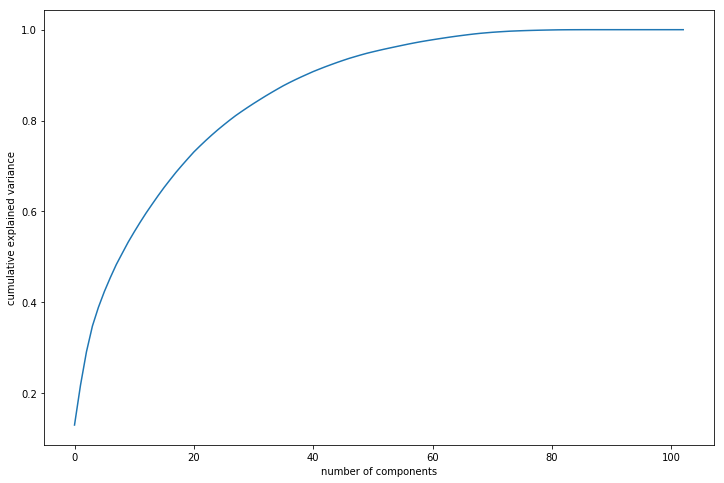

In [112]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# As the below scree plot shows, around 90% of the variance in data is explained by 40 components
# hence choosing 40 components for our model

In [113]:
# More than 90% of the variance in data is explained by 40 components as shown below
np.cumsum(pca.explained_variance_ratio_)[40]

0.907877730941407

In [114]:
#Let's try and check the first three components now
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

# Looks like the most important variables are ARPU of 8th month, onnet_mou of 8th month, offnet_mou of 8th month,
# roaming incoming, outgoing MOU for 8th month, local outgoing MOU for 8th month.

,Feature,PC1,PC2,PC3
0,arpu_8,0.084500,0.211836,0.121616
1,onnet_mou_8,-0.037528,0.146236,0.162214
2,offnet_mou_8,-0.015075,0.202506,0.107268
3,roam_ic_mou_8,0.011875,0.015297,0.017897
4,roam_og_mou_8,0.002054,0.024904,0.046251
5,loc_og_t2t_mou_8,0.017813,0.138211,-0.044169
6,loc_og_t2m_mou_8,0.037759,0.186792,-0.115787
7,loc_og_t2f_mou_8,0.030593,0.075268,-0.088833
8,loc_og_t2c_mou_8,0.003521,0.021975,0.042466
9,loc_og_mou_8,0.037144,0.212161,-0.106821


In [115]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [116]:
df_train_pca = pca_final.fit_transform(X_train_scaled)
df_train_pca.shape

(21007, 40)

In [117]:
#creating correlation matrix for the principal components, we expect little or no correlation among the components
corrmat = np.corrcoef(df_train_pca.transpose())

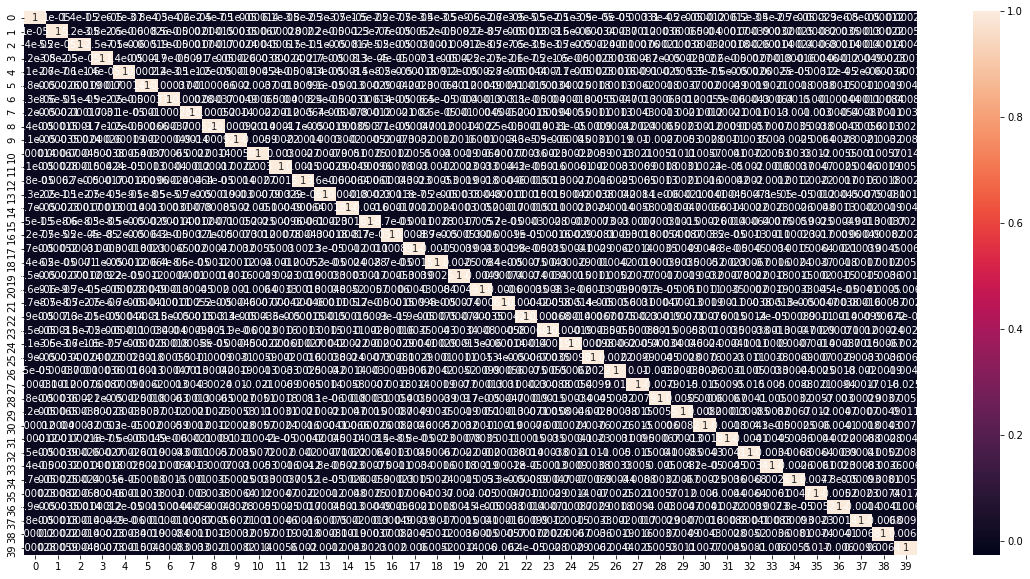

In [118]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

# we see that correlations are indeed very close to 0 as the entire heatmap is black indicating values closer to zero
# Hence we have removed the multicollinearity from the data, and hence our models can be much more stable

In [119]:
# replace 1s with 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
# Now print the lower and highest correlation value from the matrix
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

# As we can see the values are much closer to zero hence no correlation between components as expected.

max corr: 0.01650564391475777 , min corr:  -0.025213757269608252


In [120]:
#Applying selected components to the test data - 40 components
df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(9004, 40)

# 1. Logistic Regression Model

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [123]:
# 1.  Make predictions on train data
pred_train = model_pca.predict(df_train_pca)
#convert predicted values from array to dataframe
pred_train_df = pd.DataFrame(pred_train)

#2.  Make predictions on the test data
pred_test = model_pca.predict(df_test_pca)
#convert predicted values from array to dataframe
pred_test_df = pd.DataFrame(pred_test)

# 3. accuracy score on train data
print(metrics.accuracy_score(y_train, pred_train_df)) 
# accuracy score on test data
print(metrics.accuracy_score(y_test, pred_test_df)) 

# Looks like the accuracy score on train data is 92% and on test data is 92% as well.

0.9209311181986957
0.9248111950244335


In [124]:
# Precision is the ratio of true positives/(true positives+false positives). Recall is the ratio of
# True Positives/(True Positives + False Negatives). Hence recall is the ability to find all positive samples i.e
# find all churn customers. Therefore in our case recall is more important metric.

#Confusion Matrix on test data
print(metrics.confusion_matrix(y_test,pred_test_df))
cm=metrics.confusion_matrix(y_test,pred_test_df)
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

#Precision is 
print(cm[1,1]/(cm[1,1]+cm[0,1]))
#Recall is
print(cm[1,1]/(cm[1,1]+cm[1,0]))

# The Recall value is only 21% which is not a very good number. Hence this model is predicting more churn customers
# as non churn which can be an issue for the business as we will miss the opprtunity to win back the customers.
# This low Recall rate might be because of the imbalance in data. 

# lets try different logistic model with balancaed data
# Also next we will try creating Random Forest Model as well since they are known to perform well on imbalanced data.

[[8158   76]
 [ 601  169]]
0.689795918367347
0.21948051948051947


In [125]:
# Balance the data using SMOTE
from imblearn.over_sampling import SMOTE

SM = SMOTE(kind = "regular")
X_train_n,y_train_n = SM.fit_sample(X_train_scaled,y_train)
print(X_train_n.shape)
print(y_train_n.shape)


(38368, 103)
(38368,)


In [126]:
# The amount of records now in each category is same
# The majority class of Non Churn is equal to the total number of minority class i.e Churn.
np.bincount(y_train_n)

array([19184, 19184], dtype=int64)

In [127]:
# PCA - Principal Component Analysis Again
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
#Performing the PCA
pca.fit(X_train_n)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [128]:
# More than 90% of the variance in data is explained by 40 components as shown below
np.cumsum(pca.explained_variance_ratio_)[40]

0.908836288730981

In [129]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [130]:
# Fit on train data
df_train_pca = pca_final.fit_transform(X_train_n)
df_train_pca.shape

(38368, 40)

In [131]:
#Applying selected components to the test data - 40 components
df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(9004, 40)

In [132]:
y_train_n.shape

(38368,)

# 2. Logistic Regression Model with Balanced Data

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_n)

# 1.  Make predictions on train data
pred_train = model_pca.predict(df_train_pca)
#convert predicted values from array to dataframe
pred_train_df = pd.DataFrame(pred_train)

#2.  Make predictions on the test data
pred_test = model_pca.predict(df_test_pca)
#convert predicted values from array to dataframe
pred_test_df = pd.DataFrame(pred_test)

# 3. accuracy score on train data
print(metrics.accuracy_score(y_train_n, pred_train_df)) 
# accuracy score on test data
print(metrics.accuracy_score(y_test, pred_test_df)) 

# Looks like the accuracy score has reduced from our previous model value of 92%.
# We got around 83% on train and 81% on test.

0.8296497080900751
0.8113060861839183


In [134]:
#Confusion Matrix on test data
print(metrics.confusion_matrix(y_test,pred_test_df))
cm=metrics.confusion_matrix(y_test,pred_test_df)

[[6662 1572]
 [ 127  643]]


In [135]:
print(metrics.recall_score(y_test,pred_test_df))
print(metrics.precision_score(y_test,pred_test_df))

# The recall score is still low which is 29%. But its better than previous model with 21% recall score.

0.8350649350649351
0.29029345372460497


# 3. Random Forest Model with Default Parameters

In [136]:
# Now lets try to create Random Forest model as they work well with imbalanced data.
# Random Forest Model

In [137]:
# Let's first fit a random forest model with default hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [138]:
# fit with original non scaled X_train and y_train. Random forest doesnt need data to be scaled.
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
# predict
predictions = rfc.predict(X_test)

In [144]:
# Let's check the report of our default model
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8234
           1       0.76      0.45      0.56       770

    accuracy                           0.94      9004
   macro avg       0.85      0.72      0.77      9004
weighted avg       0.93      0.94      0.93      9004



In [145]:
# Printing confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[8124  110]
 [ 426  344]]


In [146]:
# Accuracy Score
print(metrics.accuracy_score(y_test,predictions))

0.9404709018214127


# 4. Random Forest Model with Tuned parameters

In [147]:
# Now build Random Forest with hyperparameters tuned

# 1. Find optimum value for max-depth

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, return_train_score=True, scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [148]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.157188,0.012776,0.008973,0.002522,2,{'max_depth': 2},0.936459,0.935031,0.941456,0.940966,...,0.937592,0.003057,6,0.937876,0.940375,0.938887,0.938712,0.934551,0.938080,0.001940
1,0.289827,0.019047,0.008786,0.001159,4,{'max_depth': 4},0.937173,0.934555,0.939315,0.941681,...,0.937925,0.002408,5,0.940018,0.940970,0.939006,0.938831,0.939133,0.939592,0.000802
2,0.408514,0.016151,0.010977,0.001671,6,{'max_depth': 6},0.939791,0.934079,0.939315,0.941204,...,0.938497,0.002423,2,0.942398,0.942815,0.942577,0.942045,0.941810,0.942329,0.000361
3,0.487518,0.007744,0.009564,0.001203,8,{'max_depth': 8},0.938363,0.934793,0.940743,0.941204,...,0.938878,0.002281,1,0.948587,0.948944,0.951324,0.948292,0.948950,0.949219,0.001081
4,0.570865,0.005675,0.009771,0.000398,10,{'max_depth': 10},0.937173,0.935983,0.938363,0.940490,...,0.938259,0.001575,3,0.961500,0.959417,0.961262,0.960431,0.960374,0.960596,0.000738


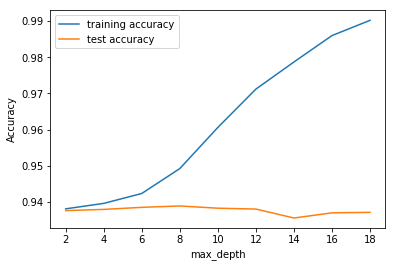

In [149]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# We can see that as the value of max_depth increases, both train and test scores increase till a point,
# but after that test score starts to decrease. The model tries to overfit as we increase the max_depth.

In [150]:
# 2. Find optimum value for n_estimators
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier(max_depth=2)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [151]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.346001,0.031053,0.030332,0.001944,100,{'n_estimators': 100},0.937173,0.935269,0.935507,0.941443,...,0.937259,0.002221,2,0.937757,0.940256,0.938114,0.936332,0.937288,0.937949,0.001299
1,6.535323,0.098522,0.131836,0.008504,500,{'n_estimators': 500},0.936697,0.935507,0.935983,0.940966,...,0.937307,0.001937,1,0.937459,0.940970,0.938114,0.937165,0.937526,0.938247,0.001396
2,11.447171,0.045670,0.220016,0.000795,900,{'n_estimators': 900},0.936697,0.934317,0.936459,0.941443,...,0.937116,0.002339,3,0.937876,0.939185,0.938054,0.936749,0.937645,0.937902,0.000783
3,16.436420,0.057353,0.327921,0.021663,1300,{'n_estimators': 1300},0.936697,0.935269,0.935983,0.940966,...,0.937069,0.002008,4,0.937638,0.939958,0.937816,0.937284,0.937824,0.938104,0.000948


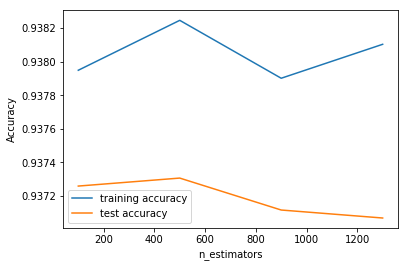

In [152]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [153]:
# 3. Find optimum value for max_features [max no. of features considered for splitting a node]
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier(max_depth=2)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [154]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.095147,0.009621,0.008385,0.002326,4,{'max_features': 4},0.913137,0.915992,0.920990,0.924780,...,0.921931,0.007566,5,0.913240,0.915620,0.921392,0.923539,0.937407,0.922240,0.008453
1,0.143431,0.010015,0.009169,0.002045,8,{'max_features': 8},0.938601,0.936459,0.936221,0.940014,...,0.937545,0.001509,3,0.939006,0.938054,0.937459,0.936035,0.937645,0.937640,0.000964
2,0.198286,0.003635,0.007960,0.000015,14,{'max_features': 14},0.938839,0.934079,0.936221,0.940252,...,0.937449,0.002136,4,0.939066,0.941029,0.937697,0.939129,0.939371,0.939258,0.001062
3,0.259928,0.005646,0.007768,0.000397,20,{'max_features': 20},0.938839,0.935983,0.942408,0.941443,...,0.939592,0.002238,1,0.939244,0.939244,0.938292,0.938891,0.939668,0.939068,0.000459
4,0.303805,0.007315,0.007579,0.000493,24,{'max_features': 24},0.939077,0.935745,0.942170,0.939300,...,0.938830,0.002093,2,0.939244,0.940553,0.937400,0.939069,0.939073,0.939068,0.001002


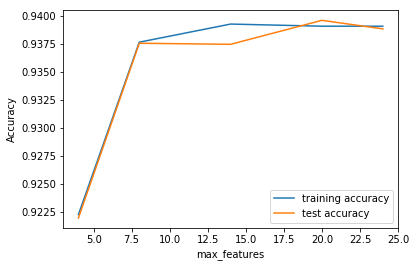

In [155]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [156]:
# 3. Find optimum value for min samples leaf [min no. of samples required to be at a leaf node]
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [157]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.549920,0.019317,0.011752,0.003125,100,{'min_samples_leaf': 100},0.937173,0.935507,0.941456,0.940490,...,0.938878,0.002205,1,0.938649,0.939066,0.939899,0.939010,0.939906,0.939306,0.000508
1,0.492093,0.023722,0.009981,0.001537,150,{'min_samples_leaf': 150},0.937411,0.934555,0.936935,0.940014,...,0.937211,0.001734,2,0.937400,0.938292,0.937043,0.937582,0.937883,0.937640,0.000425
2,0.447219,0.013601,0.009177,0.000394,200,{'min_samples_leaf': 200},0.935269,0.933603,0.937649,0.940014,...,0.936402,0.002217,4,0.937102,0.938530,0.936924,0.936868,0.937229,0.937330,0.000613
3,0.451784,0.019205,0.009977,0.001088,250,{'min_samples_leaf': 250},0.937411,0.933127,0.935031,0.937872,...,0.935879,0.001710,5,0.937578,0.935971,0.937281,0.936927,0.938776,0.937307,0.000912
4,0.408300,0.007665,0.008784,0.000410,300,{'min_samples_leaf': 300},0.936459,0.933365,0.937887,0.939776,...,0.936640,0.002145,3,0.937697,0.938114,0.936507,0.938058,0.937526,0.937580,0.000580


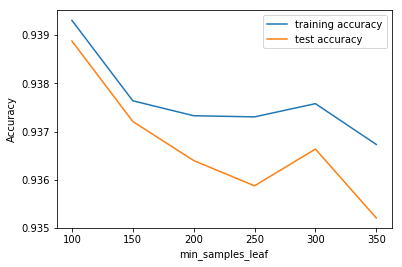

In [158]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# The model tries to overfit as we decrease the min samples leaf.

In [159]:
# 3. Find optimum value for min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [160]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.866089,0.025672,0.010959,0.000617,200,{'min_samples_split': 200},0.938363,0.934555,0.938363,0.942395,...,0.938068,0.002577,2,0.941982,0.942577,0.940910,0.940259,0.941036,0.941353,0.000823
1,0.782313,0.023760,0.010372,0.000464,250,{'min_samples_split': 250},0.939077,0.935507,0.938125,0.939776,...,0.937592,0.001793,4,0.940256,0.941506,0.941029,0.939486,0.938954,0.940246,0.000943
2,0.831391,0.038656,0.011743,0.001467,300,{'min_samples_split': 300},0.939553,0.934793,0.935745,0.939776,...,0.937449,0.001990,5,0.940196,0.940256,0.938709,0.940021,0.939787,0.939794,0.000567
3,0.794691,0.052116,0.010568,0.001198,350,{'min_samples_split': 350},0.936697,0.935269,0.935745,0.940252,...,0.937307,0.001857,6,0.938649,0.940851,0.937935,0.938415,0.939727,0.939116,0.001048
4,0.773551,0.045124,0.010757,0.000748,400,{'min_samples_split': 400},0.936697,0.934555,0.937411,0.942157,...,0.938163,0.002648,1,0.939363,0.940791,0.938471,0.939069,0.940263,0.939592,0.000833


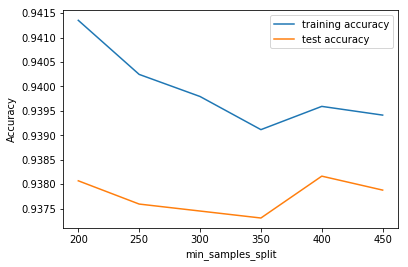

In [161]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [162]:
#Optimal hyperparameters using GridSearchCV.

In [163]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [164]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [165]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9380206597800733 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [166]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=100)

In [167]:
# fit
rfc.fit(X_train,y_train)
# predict
predictions = rfc.predict(X_test)

In [168]:
# Report on test data
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8234
           1       0.79      0.47      0.59       770

    accuracy                           0.94      9004
   macro avg       0.87      0.73      0.78      9004
weighted avg       0.94      0.94      0.94      9004



In [169]:
# Confusion matrix 
print(metrics.confusion_matrix(y_test,predictions))

# Both Precision score and Recall score has improved in Random forest when compared to regression model.
# The Recall score [359/(359+411)] is at 47% which is not really good but its better than the 29% of Logistic Regression model.

[[8137   97]
 [ 411  359]]


In [170]:
# Accuracy score for Random Forest Model is 94%.
print(metrics.accuracy_score(y_test,predictions))

0.9435806308307418


In [171]:
# Feature Importance
feat_imp = pd.DataFrame({'importance':rfc.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp    

# The top important features or variables predicting a customer getting churned as per Random Forest Model are
# local incoming MOU, Total outgoing MOU, ARPU, Total Recharge Amount for 8th month.

,importance,feature
26,1.590175e-01,total_ic_mou_8
21,1.236075e-01,loc_ic_mou_8
19,1.102948e-01,loc_ic_t2m_mou_8
17,8.518619e-02,total_og_mou_8
9,5.582309e-02,loc_og_mou_8
0,5.282055e-02,arpu_8
31,4.759115e-02,total_rech_amt_8
18,4.402406e-02,loc_ic_t2t_mou_8
6,3.413112e-02,loc_og_t2m_mou_8
33,2.618008e-02,last_day_rch_amt_8
